In [1]:
def Print_values(a, b, c):
    if a > b:
        if b > c:
            # case: a > b > c
            result = a + b - 10 * c
            print(f"Result: {result} (a > b > c)")
        else:
            if a > c:
                # case: a > c >= b
                result = a + c - 10 * b
                print(f"Result: {result} (a > c >= b)")
            else:
                # case: c >= a > b
                result = c + a - 10 * b
                print(f"Result: {result} (c >= a > b)")
    else:
        if b > c:
            if a > c:
                # case: b > a > c
                result = b + a - 10 * c
                print(f"Result: {result} (b > a > c)")
            else:
                # case: b > c >= a
                result = b + c - 10 * a
                print(f"Result: {result} (b > c >= a)")
        else:
            # case: c >= b >= a
            result = c + b - 10 * a
            print(f"Result: {result} (c >= b >= a)")

# Test with a = 10, b = 5, c = 1
Print_values(10, 5, 1)

Result: 5 (a > b > c)


In [3]:
import math

a = {1: 1}  # Base case: F(1) = 1

def F(x):
    if x in a:
        return a[x]
    else:
        a[x] = F(math.ceil(x / 3)) + 2 * x
        return a[x]

def compute_values(lst):
    return [F(x) for x in lst]

# Example usage:
lst = [10, 15, 20]  # Input list
result = compute_values(lst)
print(result)

[33, 45, 61]


In [5]:
def Find_number_of_ways(n, x):
    dp = [[0] * (x + 1) for _ in range(n + 1)]
    dp[0][0] = 1 
    
    for i in range(1, n + 1):
        for j in range(1, x + 1):
            dp[i][j] = sum(dp[i-1][j-k] for k in range(1, 7) if j - k >= 0)
    
    return dp[n][x]

def Find_max_number_of_ways():
    Number_of_ways = [] 
    n = 10 
    for x in range(10, 61):
        ways = Find_number_of_ways(n, x)
        Number_of_ways.append(ways)
    
    max_ways = max(Number_of_ways)
    max_x = 10 + Number_of_ways.index(max_ways)
    
    return Number_of_ways, max_x, max_ways

# Example usage:
Number_of_ways, max_x, max_ways = Find_max_number_of_ways()
print(f"The sum {max_x} yields the maximum number of ways: {max_ways}")

The sum 35 yields the maximum number of ways: 4395456


随机生成的数组:  [7, 3, 10, 3, 0]
所有子集平均值的总和:  8.0


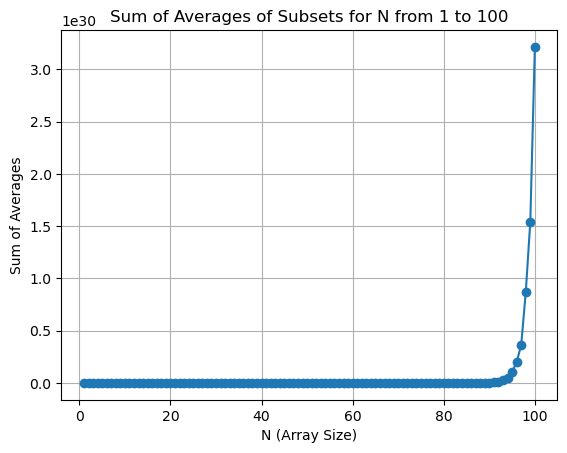

In [11]:
import random

def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]

array = Random_integer(5)
print("随机生成的数组: ", array)

def Sum_averages(array):
    N = len(array)
    if N == 0:
        return 0
    total_sum = sum(array)
    return (total_sum * (2**(N-1))) / N

array = [1, 2, 3]
print("所有子集平均值的总和: ", Sum_averages(array)) 
import matplotlib.pyplot as plt

Total_sum_averages = []

for N in range(1, 101):
    array = Random_integer(N)  
    total_sum = Sum_averages(array) 
    Total_sum_averages.append(total_sum)  

# 绘制 Total_sum_averages
plt.plot(range(1, 101), Total_sum_averages, marker='o')
plt.title('Sum of Averages of Subsets for N from 1 to 100')
plt.xlabel('N (Array Size)')
plt.ylabel('Sum of Averages')
plt.grid(True)
plt.show()

In [31]:
import random
import numpy as np

def create_matrix(N, M):
    matrix = np.random.randint(0, 2, size=(N, M)) 
    matrix[0][0] = 1  
    matrix[N-1][M-1] = 1  
    return matrix

def Count_path(matrix, N, M):
    dp = [[0] * M for _ in range(N)]
    
    if matrix[0][0] == 0:
        return 0
    
    dp[0][0] = 1
    
    for i in range(N):
        for j in range(M):
            if matrix[i][j] == 1:  
                if i > 0:
                    dp[i][j] += dp[i-1][j]
                if j > 0:
                    dp[i][j] += dp[i][j-1]

    return dp[N-1][M-1]

def run_simulation(N, M, num_trials):
    total_paths = []
    for _ in range(num_trials):
        matrix = create_matrix(N, M)  
        paths = Count_path(matrix, N, M)  
        total_paths.append(paths)
    
    mean_paths = np.mean(total_paths)
    return mean_paths, total_paths

# Example usage
N = 10
M = 8
num_trials = 1000

mean_paths, all_paths = run_simulation(N, M, num_trials)
print(f"The mean number of paths over {num_trials} trials is: {mean_paths}")

The mean number of paths over 1000 trials is: 0.357
